In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df = pd.read_csv("/content/expanded_dataset.csv")


In [5]:
df.shape


(12264, 9)

In [6]:


df.columns



Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12264 entries, 0 to 12263
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                12264 non-null  object 
 1   Temperature             12263 non-null  float64
 2   Humidity                12263 non-null  float64
 3   WindSpeed               12263 non-null  float64
 4   GeneralDiffuseFlows     12263 non-null  float64
 5   DiffuseFlows            12263 non-null  float64
 6   PowerConsumption_Zone1  12263 non-null  float64
 7   PowerConsumption_Zone2  12263 non-null  float64
 8   PowerConsumption_Zone3  12263 non-null  float64
dtypes: float64(8), object(1)
memory usage: 862.4+ KB


In [8]:

df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
df.isna().sum(axis=0)


,0
Datetime,0
Temperature,1
Humidity,1
WindSpeed,1
GeneralDiffuseFlows,1
DiffuseFlows,1
PowerConsumption_Zone1,1
PowerConsumption_Zone2,1
PowerConsumption_Zone3,1


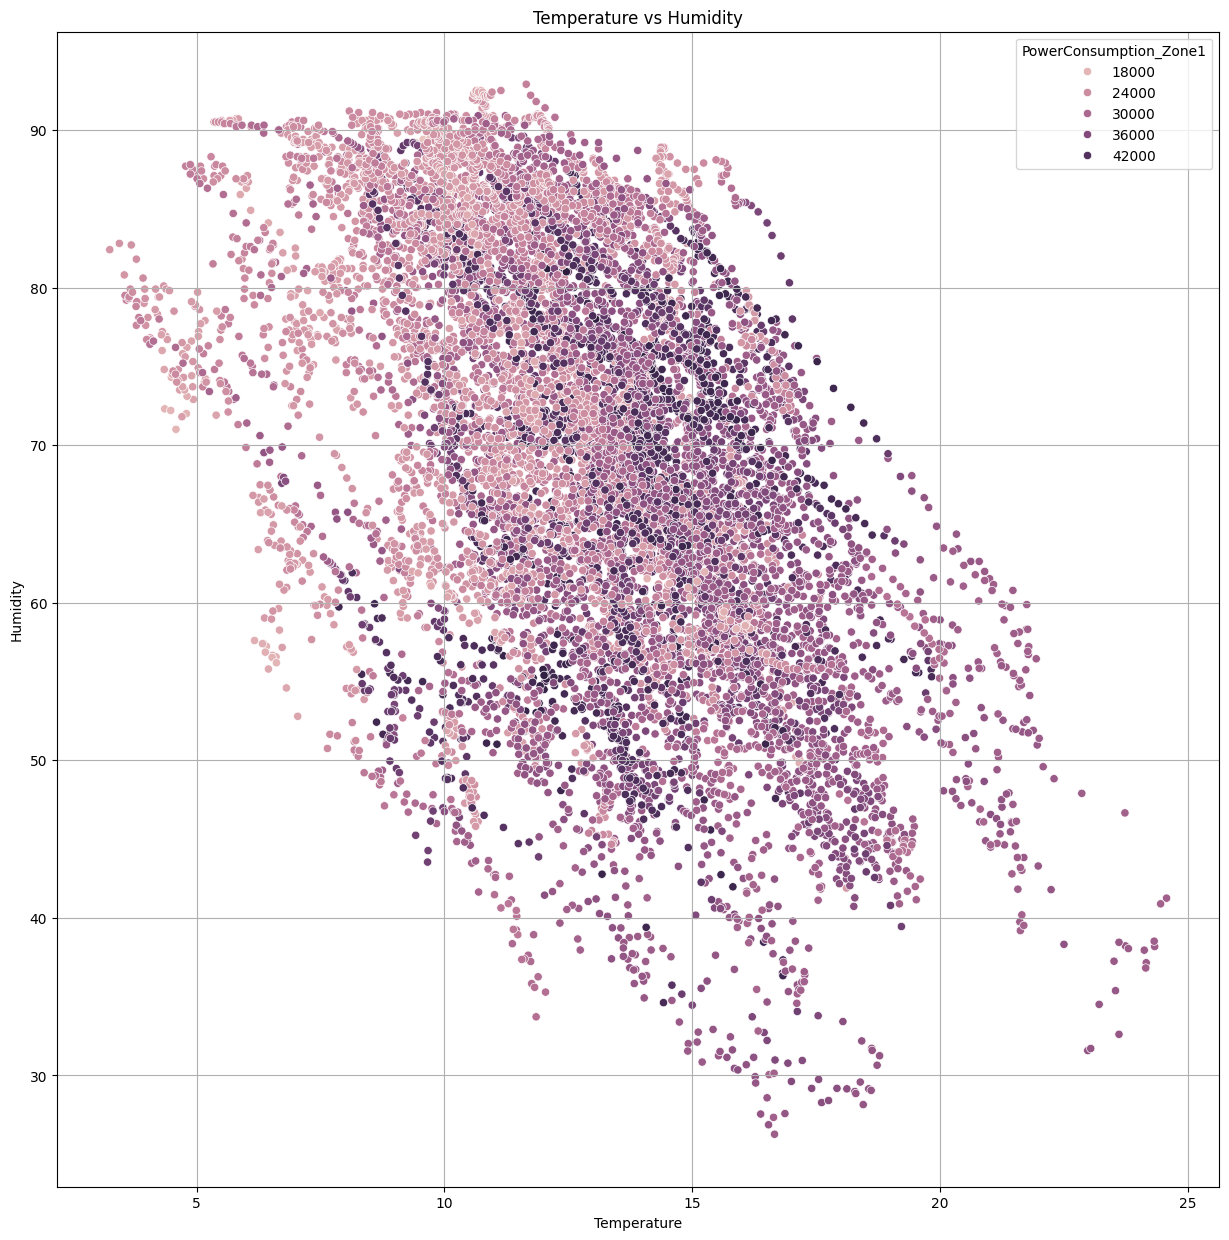

In [10]:

plt.figure(figsize=(15, 15))
sns.scatterplot(df, x="Temperature", y="Humidity",hue="PowerConsumption_Zone1")
plt.title("Temperature vs Humidity")
plt.grid(True)


<Axes: xlabel='Temperature', ylabel='Humidity'>

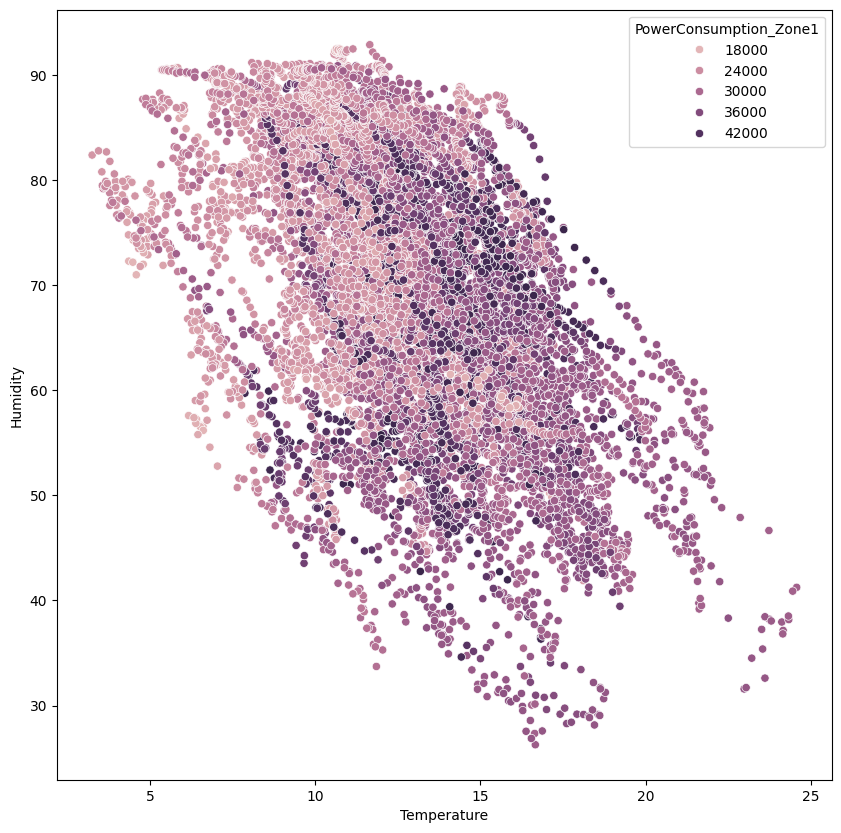

In [11]:


plt.figure(figsize=(10, 10))
sns.scatterplot(df, x="Temperature", y="Humidity", hue="PowerConsumption_Zone1")


In [12]:

df.DiffuseFlows


,DiffuseFlows
0,0.119
1,0.085
2,0.100
3,0.096
4,0.085
...,...
12259,0.185
12260,0.211
12261,0.122
12262,0.159


In [13]:
df_sample = df.sample(frac=0.15)


In [14]:


df_sample = df.sample(frac=1)


In [15]:
def create_labels_diffusion(x):
    if x<= df_sample.DiffuseFlows.quantile(0.25):
        return "<=25%"
    elif df_sample.DiffuseFlows.quantile(0.25)<x<= df_sample.DiffuseFlows.quantile(0.5):
        return "25%<x<=50%"
    elif df_sample.DiffuseFlows.quantile(0.5)<x<= df_sample.DiffuseFlows.quantile(0.75):
        return "50%<x<=75%"
    else:
        return "75%<x"


In [16]:
df_sample["Diffusion_Labels"] = df_sample.DiffuseFlows.apply(lambda x:create_labels_diffusion(x))


In [17]:
# df_sample.to_csv("sampled_dataset.csv", index=False)


In [18]:
# df_sample= pd.read_csv("sampled_dataset.csv")


<Axes: xlabel='Diffusion_Labels'>

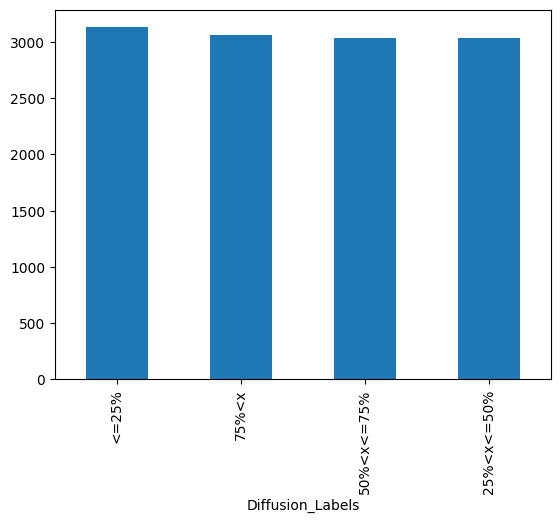

In [19]:
df_sample.Diffusion_Labels.value_counts().plot(kind="bar")


<Axes: xlabel='Temperature', ylabel='Humidity'>

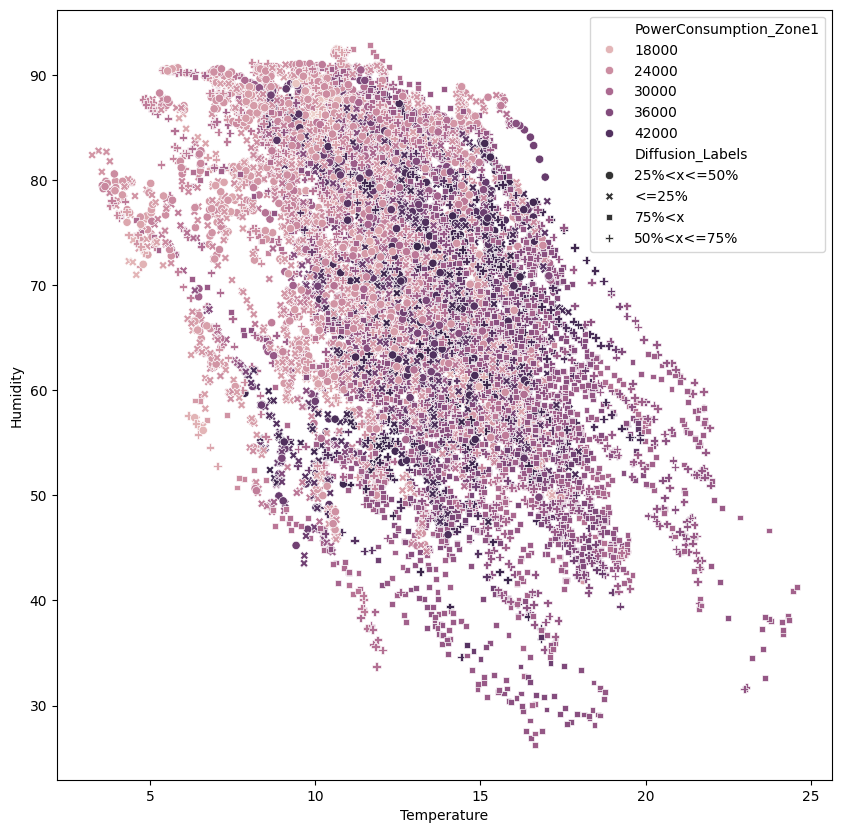

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(df_sample, x="Temperature", y="Humidity", hue="PowerConsumption_Zone1", style="Diffusion_Labels")


<Axes: xlabel='Temperature', ylabel='Humidity'>

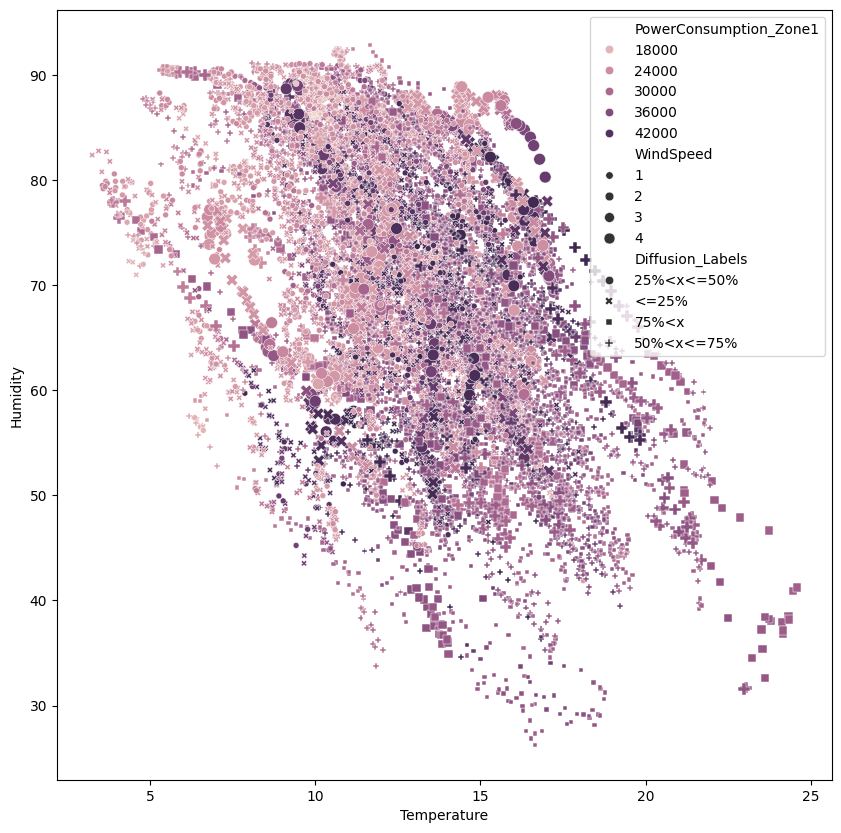

In [21]:


plt.figure(figsize=(10, 10))
sns.scatterplot(df_sample, x="Temperature", y="Humidity", hue="PowerConsumption_Zone1", style="Diffusion_Labels", size="WindSpeed")



In [22]:

df_sample = df.sample(frac=0.35)


In [23]:
px.scatter(df_sample, x="Temperature", y="Humidity")


In [24]:


px.scatter(df, x="Temperature", y="Humidity", color="PowerConsumption_Zone1")



In [25]:

px.scatter(df_sample, x="Temperature", y="Humidity", color="PowerConsumption_Zone1", symbol="WindSpeed")


In [26]:


# px.scatter(df_sample, x="Temperature", y="Humidity", color="PowerConsumption_Zone1", symbol="WindSpeed", size="WindSpeed")


In [29]:
!pip install pmdarima

In [30]:
!pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00


In [31]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from tbats import TBATS



In [32]:

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value",
                                             "Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [33]:
print('df types:\n', df.dtypes)


df types:
 Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object


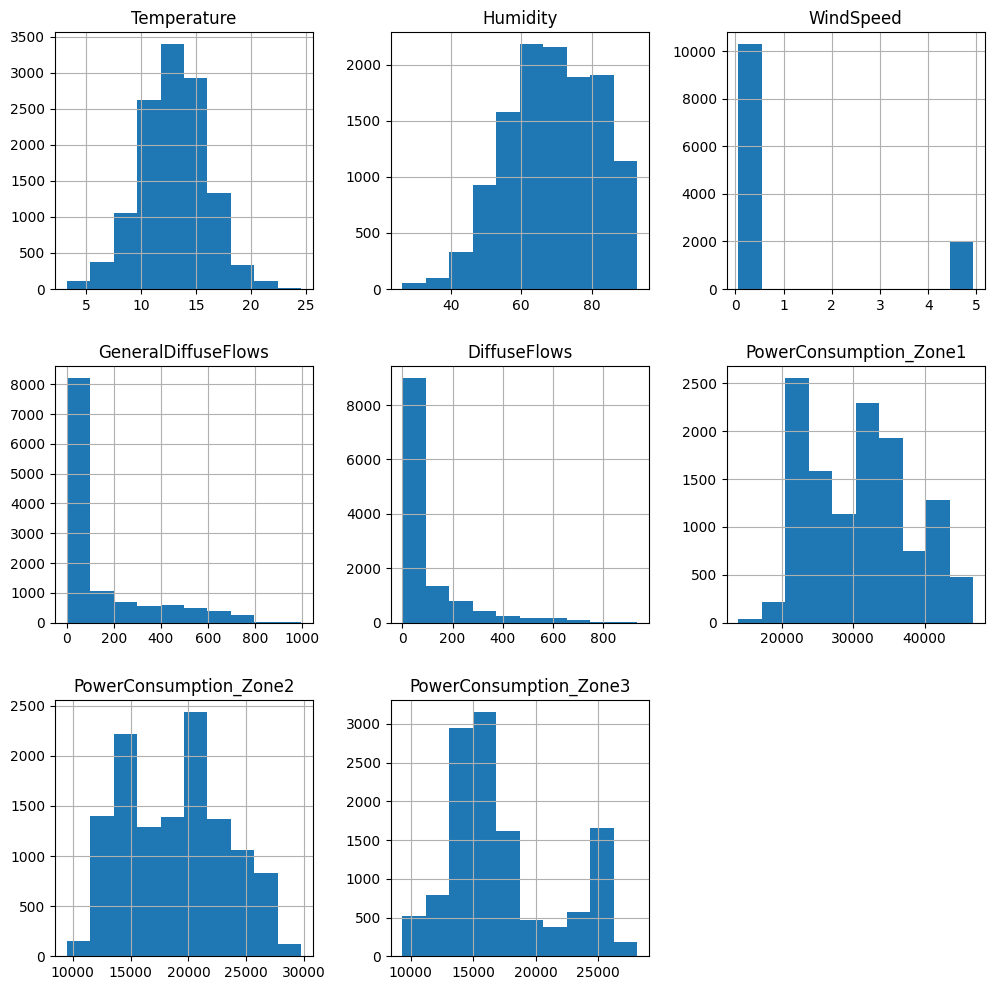

In [34]:

df.hist(figsize=(12,12))
plt.show()



In [35]:


powerZ1 = pd.Series(data=df['PowerConsumption_Zone1'].values, index=df['Datetime'].values)
powerZ1



,0
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-03-27 03:10:00,23040.00000
2017-03-27 03:20:00,22880.68085
2017-03-27 03:30:00,23150.29787
2017-03-27 03:40:00,23150.29787


In [36]:
powerZ1.index = pd.to_datetime(powerZ1.index, errors='coerce')
print(powerZ1.index[powerZ1.index.isna()])  # Identify problematic entries


DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)


In [37]:


print('Index frequency:', pd.infer_freq(powerZ1.index))
print('Number of missing values:', powerZ1.isnull().sum())



Index frequency: None
Number of missing values: 1


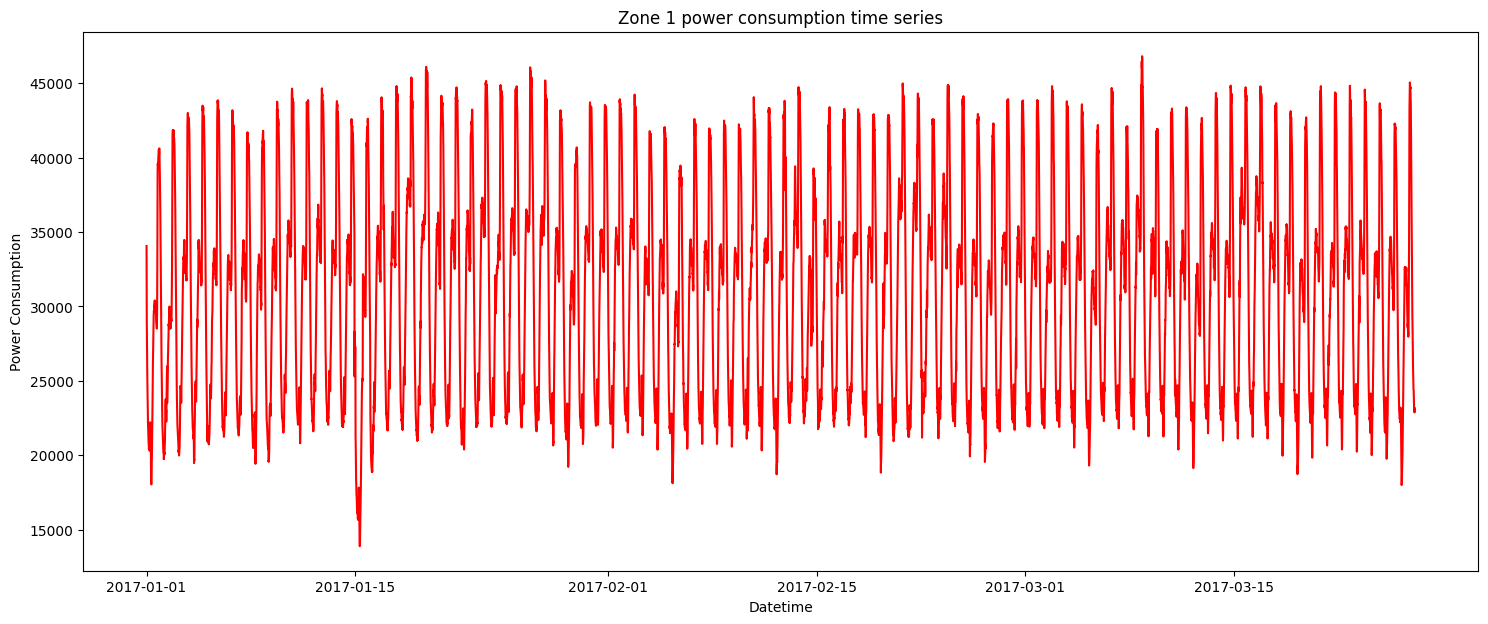

In [38]:
plt.figure(figsize=(18,7))
plt.plot(powerZ1, linestyle='-', color='red')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Zone 1 power consumption time series')
plt.show()
